# NATL12 : boundary definition and bathymetry

__source__ : from Romain eORCA12 bathymetry, trying to reproduce HyCOM 1/50 model region from E. Chassignet

__tools__ : [BMGTools](http://wwz.ifremer.fr/mars3d/Les-outils/BathyMeshGridTOOLS)

### 0. HyCOM region

* 30° South
* All Mediterranean sea included
* All Gulf of Mexico included
* Northern frontier cuts Svalbard and Groenland

<img width="600" src="natl50_hycom.png"></img>

### 1. Cut-off from eORCA12

#### First cut

* cdffindij  -100 35 -30 80 
  * x,2245,3393 y,1675,3453 
  * not quite right :
     * lacks some grid points in Gulf of Mexico
     * too much grid points in Eastern Mediterranean sea
     
* x,2271,3879 y,1675,3453 : better

NATL12 has now 1609 x 1779 =  2 862 411 grid points, 18,37% of eORCA12



In [2]:
%matplotlib inline
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as npy
from mpl_toolkits.basemap import Basemap


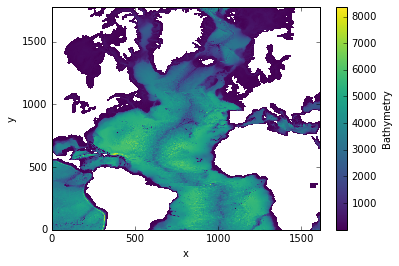

In [3]:
file="~/Data/eORCA12/NATL12/NATL12ext_bathymetry.nc"

ds=xr.open_dataset(file)
bathy=ds.Bathymetry

bathy_ma=bathy.where(bathy>0)
bathy_ma.plot()


#### Removing extra ocean

Using BMGTools (bathymetry=0), has been retrieved :

* Pacific ocean in the South-West corner
* Indian ocean in the South-East corner
* Black sea
* North-America lakes

What about Hudson bay ? Not removed in DRAKKAR ORCA12


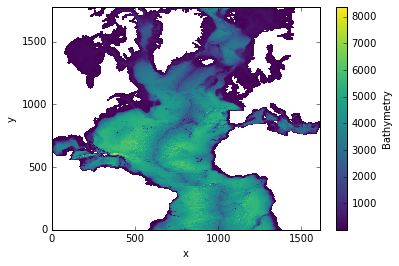

In [2]:
file2="~/Data/eORCA12/NATL12/NATL12ext_bathymetry_v1.0.nc"

ds=xr.open_dataset(file2)
bathy=ds.Bathymetry

bathy_ma=bathy.where(bathy>0)
bathy_ma.plot()

#### The Northern Boundary

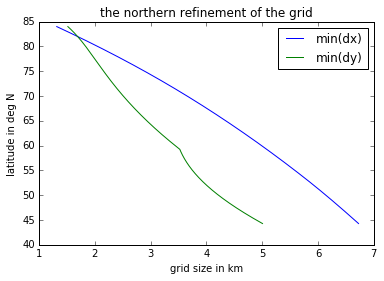

In [4]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import numpy as npy
file="~/Data/eORCA12/NATL12/NATL12ext_coordinates.nc"

ds=xr.open_dataset(file)
dx=ds.e1t
dy=ds.e2t
lat=ds.nav_lat
lon=ds.nav_lon

Ne1t=dx.sel(y=slice(968,1779))[0,0]
Ne2t=dy.sel(y=slice(968,1779))[0,0]
Nlat_20W=lat.sel(x=902,y=slice(968,1779))


min_Ne1t=npy.min(Ne1t,1)
min_Ne2t=npy.min(Ne2t,1)

fig, ax = plt.subplots()

ax.plot(0.001*min_Ne1t,Nlat_20W, label="min(dx)")
ax.plot(0.001*min_Ne2t,Nlat_20W, label="min(dy)")
ax.legend(loc=1); # upper left corner
ax.set_xlabel('grid size in km')
ax.set_ylabel('latitude in deg N')
ax.set_title('the northern refinement of the grid')

If we keep northern boundary up to 85°N, the minimal grid size is 1km wide.

We can hope to increase the timestep (360sec for eORCA12) if the grid size is not smaller than 2 or 3km.

It is interesting to cut along the Fram (Svalbard-Groenland) and the Davies Straits (Baffin-Groenland), around 80°N.

So now NATL12 has 1609 x 1700 = 2 735 300 grid points, 17.55% of eORCA12

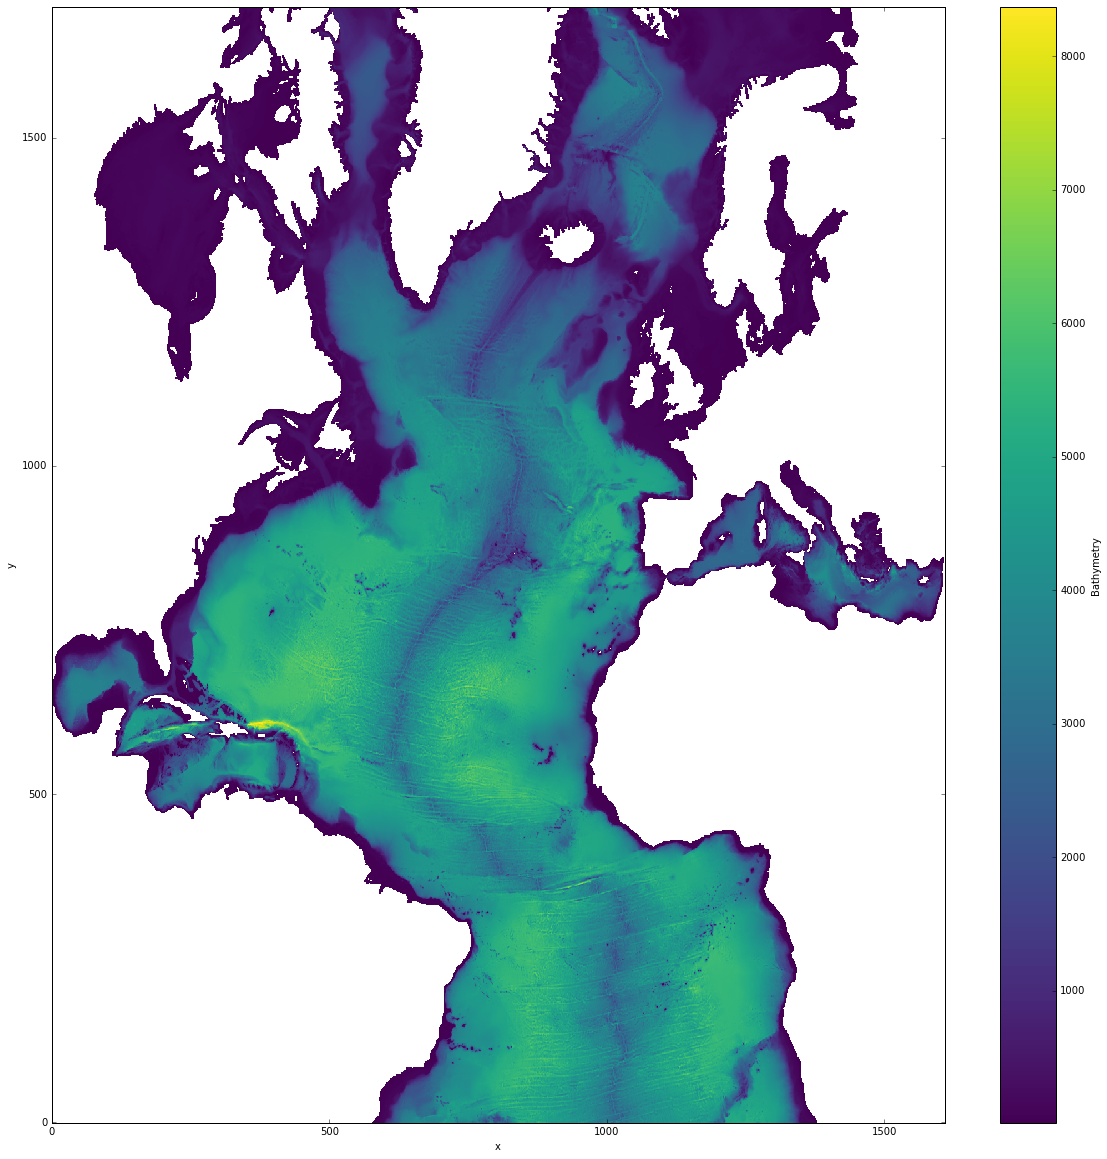

In [13]:
file3="~/Data/eORCA12/NATL12/NATL12ext_bathymetry_v2.0.nc"

ds=xr.open_dataset(file3)
bathy=ds.Bathymetry

bathy_ma=bathy.where(bathy>0)
plt.figure(figsize=(20,20))
bathy_ma.plot()

plt.savefig("bathy_NATL12.png")

We got rid of the Hudson Bay and Fox Basin : ocean points become land point up to the Hudson Detroit

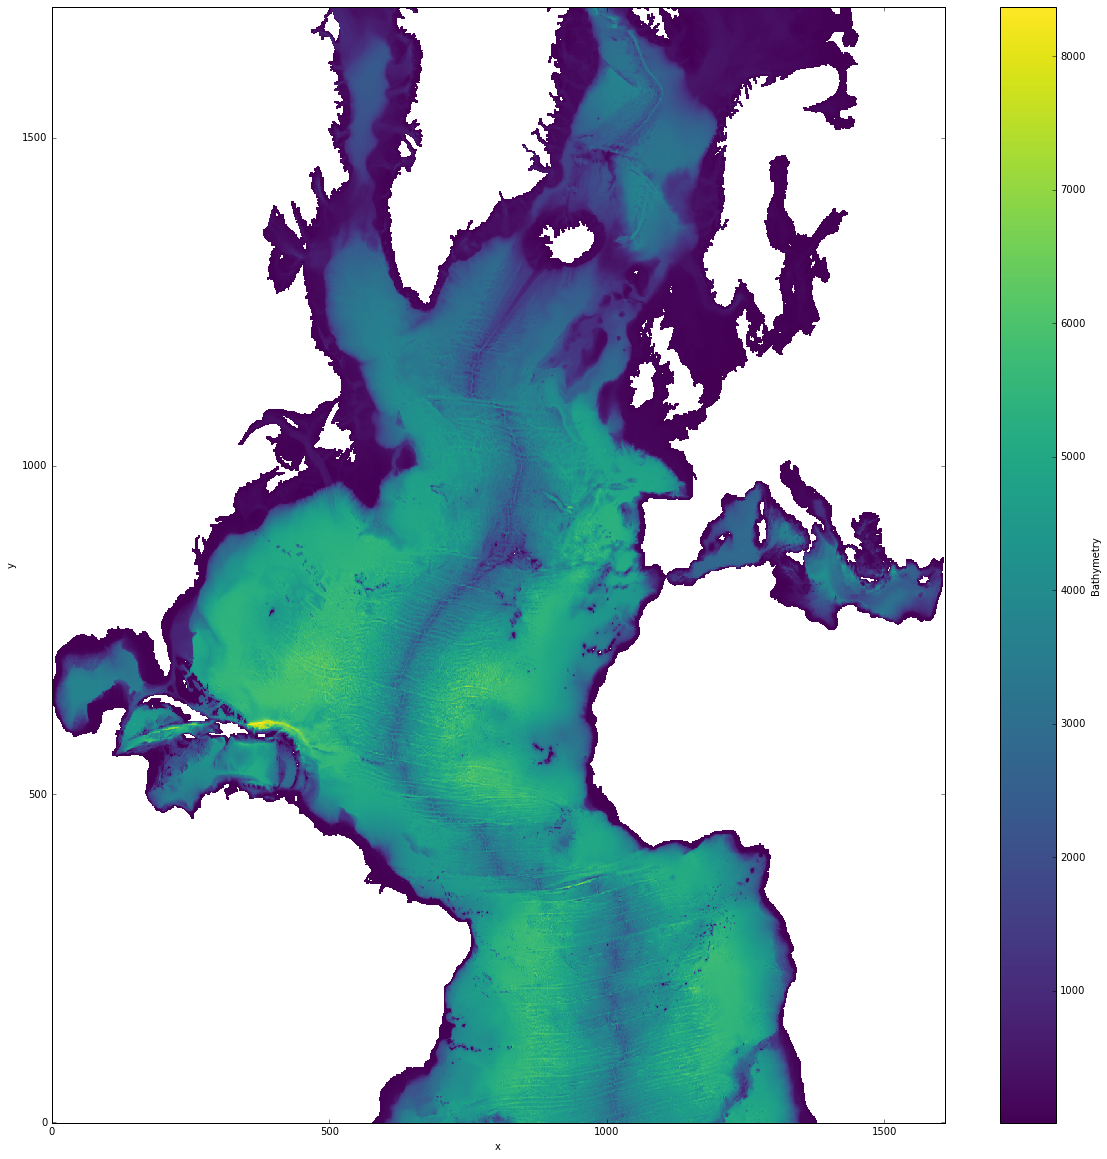

In [3]:
file4="~/Data/eORCA12/NATL12/NATL12ext_bathymetry_v3.0.nc"

ds=xr.open_dataset(file4)
bathy=ds.Bathymetry

bathy_ma=bathy.where(bathy>0)
plt.figure(figsize=(20,20))
bathy_ma.plot()

plt.savefig("bathy_NATL12.png")

Correction on the southern boundary : Hycom model has a southern boundary at 27.9417°S

In eORCA12 there are 2 grid points fitting this latitude : 27.98°S or 27.90°S (index j=1703 or 1704), we chose the last one.

Finally, NATL12 has 1609 x 1672 = 2 690 248 grid points

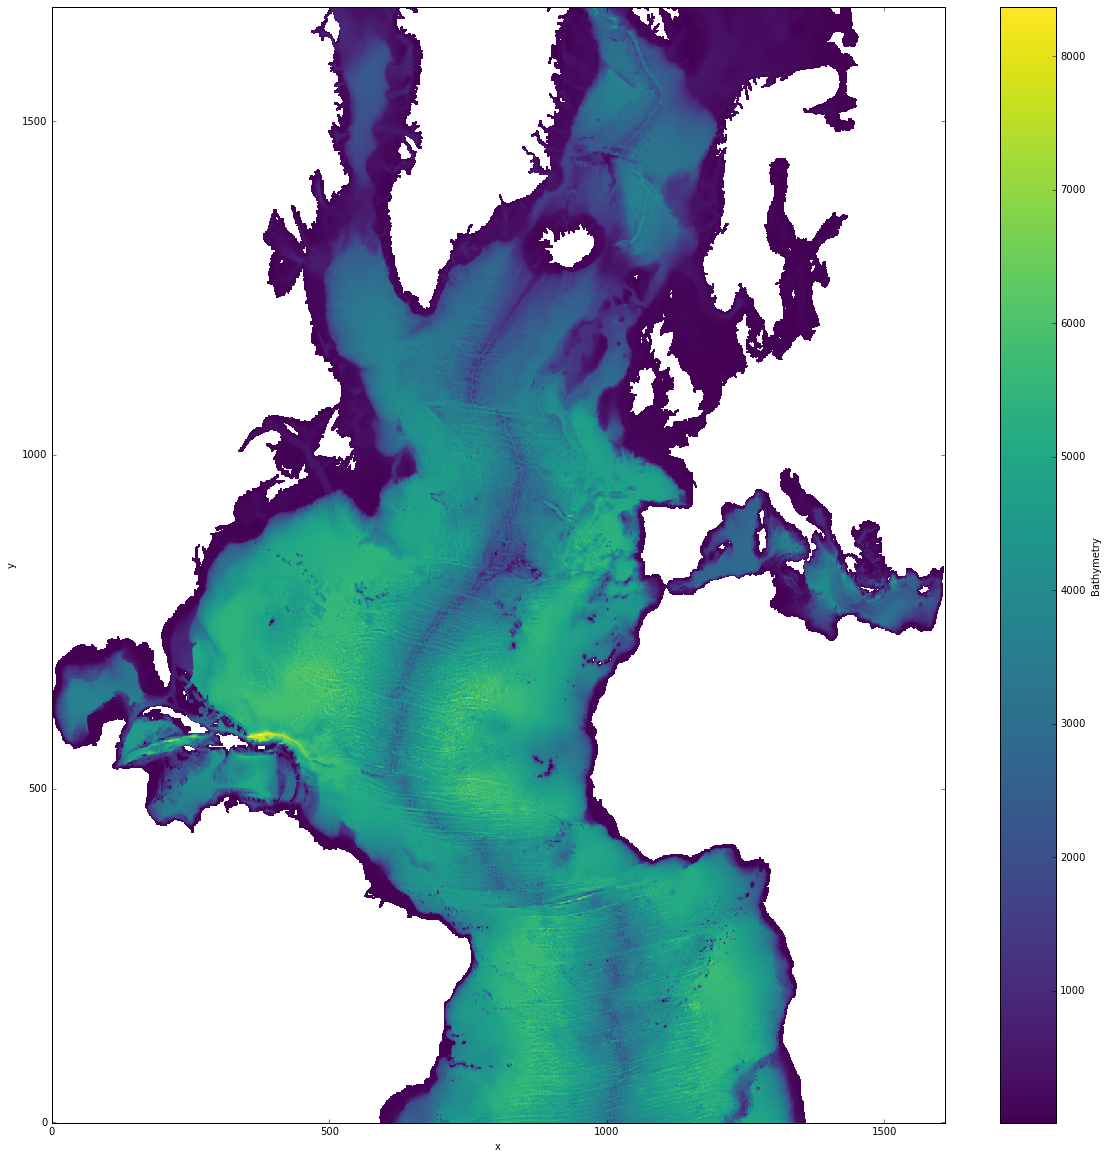

In [4]:
file4="~/Data/eORCA12/NATL12/NATL12ext_bathymetry_v4.0.nc"

ds=xr.open_dataset(file4)
bathy=ds.Bathymetry

bathy_ma=bathy.where(bathy>0)
plt.figure(figsize=(20,20))
bathy_ma.plot()

plt.savefig("bathy_NATL12.png")

### 2. MPP-PREP 

Optimal choice : 1681 procs, 46x63 sub-domains whose size is 37x29, 1217 continental sub-domains eliminated

<img width="800" src="NATL12-046x063_1681.gif"></img>

We can eventually win 50 procs by eliminating Bafin Bay, but it will create a new frontier ...

Prevision de performance en comparaison avec le run eORCA12 qui a tourné sur occigen : 32 000hCPU/an mais on va gagner du temps en enlevant les iceshelf, les icebergs, en augmentant le pas de temps, etc donc plutôt du 20 000h